In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import umap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, plot_roc_curve

In [2]:
df=pd.read_csv('./data/df.csv')
x=df.iloc[:,1:]
y=df.iloc[:,0]

df_umap=pd.read_csv('./data/df_umap.csv')
x_umap=df_umap.iloc[:,1:]

df_sd=pd.read_csv('./data/df_sd.csv')
x_sd=df_sd.iloc[:,1:]

# Model Building

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x_umap,y,test_size=0.2,random_state=44)
x_train_ori,x_test_ori,_,_=train_test_split(x,y,test_size=0.2,random_state=44)
x_train_sd,x_test_sd,_,_=train_test_split(x_sd,y,test_size=0.2,random_state=44)
# Various models are used to find the optimal one.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=50)
knc_score=cross_val_score(knc,x_train,y_train,cv=5)
print(knc_score)
print(knc_score.mean())

[0.70096463 0.75133976 0.70953912 0.71275456 0.71811361]
0.7185423365487674


In [15]:
knc_score_ori=cross_val_score(knc,x_train_ori,y_train,cv=5)
print(knc_score_ori)
print(knc_score_ori.mean())
# There is a significant drop in accuracy for KNN when using original data.
# This is expected as KNN is not suitable for high dimensional data.
# As the dimension increases, neighbors for a single point are harder to find in high dimensional space.

[0.63665595 0.68810289 0.6795284  0.64844587 0.63451233]
0.657449088960343


In [13]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb_score=cross_val_score(gnb,x_train,y_train,cv=5)
print(gnb_score)
print(gnb_score.mean())

[0.66559486 0.72347267 0.68488746 0.67416935 0.6977492 ]
0.6891747052518756


In [14]:
gnb_score_ori=cross_val_score(gnb,x_train_ori,y_train,cv=5)
print(gnb_score_ori)
print(gnb_score_ori.mean())

# Gaussian Naive Bayes seems to be invariant to the dimension change.

[0.66881029 0.71596999 0.68274384 0.66773848 0.68810289]
0.6846730975348339


In [8]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=2000)
lr_score=cross_val_score(lr,x_train,y_train,cv=5)
print(lr_score)
print(lr_score.mean())

[0.63879957 0.7170418  0.69024652 0.69560557 0.68274384]
0.684887459807074


In [12]:
# Multiple max_iter were tried, but cannot avoid convergence problem.
# This is due to a poor scaling of the original data. As suggested in variance histogram in mode_selection.ipynb, The scale varies a lot for some features.
'''
lr=LogisticRegression(solver='saga')
lr_score_ori=cross_val_score(lr,x_train_ori,y_train,cv=5)
print(lr_score_ori)
print(lr_score_ori.mean())
'''

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[0.6505895  0.71168274 0.68703108 0.65380493 0.65273312]
0.6711682743837085


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[0.69131833 0.72347267 0.71168274 0.68381565 0.67524116]
0.6971061093247588


<BarContainer object of 10 artists>

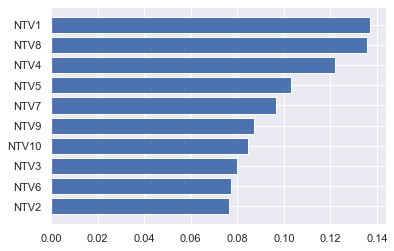

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1, n_jobs=-1)
rfc.fit(x_train,y_train)
rfc_score = cross_val_score(rfc,x_train,y_train,cv=5)
print(rfc_score)
print(rfc_score.mean())

sorted_idx = rfc.feature_importances_.argsort()
plt.barh(x_train.columns.values[sorted_idx], rfc.feature_importances_[sorted_idx])

In [36]:
rfc.fit(x_train_ori,y_train)
rfc_score_ori = cross_val_score(rfc,x_train_ori,y_train,cv=5)
print(rfc_score_ori)
print(rfc_score_ori.mean())
# Random Forest seems to have a strong prefer to the original data. Compared to itself using the reduced data & other models mentioned before, its accuracy increases ta 4~5%. However, at this point. We cannot assure if it is due to overfit.

[0.73204716 0.76527331 0.75669882 0.72561629 0.73954984]
0.7438370846730976


In [18]:
from sklearn.svm import SVC
svc = SVC(probability = True)
svc_score = cross_val_score(svc,x_train,y_train,cv=5)
print(svc_score)
print(svc_score.mean())

[0.6795284  0.73311897 0.69346195 0.69024652 0.70203644]
0.6996784565916399


In [19]:
svc_score_ori = cross_val_score(svc,x_train_ori,y_train,cv=5)
print(svc_score_ori)
print(svc_score_ori.mean())
# SVM experiences a slight drop in accuracy, but overall it's still very invariant to dimension reduction.

[0.66345123 0.72025723 0.70418006 0.67095391 0.67309753]
0.6863879957127546


In [6]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(random_state =1,use_label_encoder=False,n_jobs=-1, tree_method='gpu_hist')
xgbc_score = cross_val_score(xgbc,x_train,y_train,cv=5)
print(xgbc_score)
print(xgbc_score.mean())

[0.68381565 0.71918542 0.68060021 0.68274384 0.66773848]
0.6868167202572346


In [7]:
xgbc_score_ori = cross_val_score(xgbc,x_train_ori,y_train,cv=5)
print(xgbc_score_ori)
print(xgbc_score_ori.mean())
# Similar to Random Forest, XGBoost also prefers original data.

[0.73419078 0.76634512 0.76205788 0.73633441 0.7449089 ]
0.7487674169346195


In [8]:
from lightgbm import LGBMClassifier
lgbmc=LGBMClassifier(random_state=1,n_jobs=-1,device='gpu')
lgbmc_score=cross_val_score(lgbmc,x_train,y_train,cv=5)
print(lgbmc_score)
print(lgbmc_score.mean())

[0.68595927 0.73311897 0.69667738 0.68060021 0.68167203]
0.6956055734190781


In [9]:
lgbmc_score_ori=cross_val_score(lgbmc,x_train_ori,y_train,cv=5)
print(lgbmc_score_ori)
print(lgbmc_score_ori.mean())
# Similar to Random Forest, LightGBM also prefers original data.

[0.73204716 0.77277599 0.75777063 0.74812433 0.74169346]
0.7504823151125402


In [22]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators = [('lr',lr),('knn',knc),('rf',rfc),('gnb',gnb),('svc',svc),('xgb',xgbc),('lgbm',lgbmc)], voting = 'soft', n_jobs=-1)

vc_score = cross_val_score(vc,x_train,y_train,cv=5)
print(vc_score)
print(vc_score.mean())
#In general, a VotingClassifier is very robust.

[0.69453376 0.74276527 0.7073955  0.71168274 0.71382637]
0.7140407288317256


In [23]:
vc_score_ori = cross_val_score(vc,x_train_ori,y_train,cv=5)
print(vc_score_ori)
print(vc_score_ori.mean())

[0.71596999 0.75562701 0.72990354 0.70632369 0.71811361]
0.72518756698821


# Model Tuning

In [38]:
from sklearn.model_selection import GridSearchCV

In [40]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [26]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(x_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.6911039657020365
Best Parameters: {'C': 0.08858667904100823, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [22]:
knc = KNeighborsClassifier()
param_grid = {'n_neighbors' : [5,10,15,20,40,60,80,100],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knc = GridSearchCV(knc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knc = clf_knc.fit(x_train,y_train)
clf_performance(best_clf_knc,'KNN')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
KNN
Best Score: 0.720042872454448
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 100, 'p': 2, 'weights': 'distance'}


In [23]:
# An experiment with KNN
best_clf_knc_ori = clf_knc.fit(x_train_ori,y_train)
clf_performance(best_clf_knc_ori,'KNN')
# As expected, its best score drops.

Fitting 5 folds for each of 96 candidates, totalling 480 fits
KNN
Best Score: 0.6782422293676313
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 80, 'p': 1, 'weights': 'uniform'}


In [ ]:
svc = SVC(probability = True)
param_grid  = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5],
                'C': [.1, 1, 10, 100]},
                {'kernel': ['linear'], 'C': [.1, 1, 10, 100]},
                {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(x_train,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
SVC
Best Score: 0.7193997856377277
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [28]:
rf = RandomForestClassifier(random_state = 1, n_jobs=-1)
param_grid =  {'n_estimators': [20,50,100,200],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}

clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(x_train,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.712325830653805
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [30]:
best_clf_rf_ori = clf_rf.fit(x_train_ori,y_train)
clf_performance(best_clf_rf_ori,'Random Forest')
#This model seems to have a strong preference on the original data, instead of the reduced one.

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.7539121114683816
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


<p> XGboost is dicarded for GridSearch tuning as it takes unacceptable time. We can tune Lightgbm instead.

In [47]:
lgbmc=LGBMClassifier(random_state=1)

param_grid = {
    'boosting_type': ['gbdt','goss'],
    'learning_rate': [0.05,0.1],
    'min_data_in_leaf': [15,20,25],
    'min_sum_hessian_in_leaf': [0.001,0.002],
    'n_estimators': [10,20,50,100],
    'feature_fraction': [0.5,0.7,0.9],
    'bagging_fraction': [0.6,0.8,1.0],
    'max_depth': [10,20,50],
    'reg_alpha': [1],
    'reg_lambda': [2,5,10],
}

clf_lgbmc = GridSearchCV(lgbmc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lgbmc = clf_lgbmc.fit(x_train,y_train)
clf_performance(best_clf_lgbmc,'LGBM')

Fitting 5 folds for each of 23328 candidates, totalling 116640 fits
LGBM
Best Score: 0.7187566988210075
Best Parameters: {'bagging_fraction': 0.6, 'boosting_type': 'gbdt', 'feature_fraction': 0.5, 'learning_rate': 0.1, 'max_depth': 10, 'min_data_in_leaf': 20, 'min_sum_hessian_in_leaf': 0.001, 'n_estimators': 20, 'reg_alpha': 1, 'reg_lambda': 10, 'subsample': 0.55}


In [48]:
best_clf_lgbmc_ori = clf_lgbmc.fit(x_train_ori,y_train)
clf_performance(best_clf_lgbmc_ori,'LGBM')

Fitting 5 folds for each of 23328 candidates, totalling 116640 fits
LGBM
Best Score: 0.7635584137191854
Best Parameters: {'bagging_fraction': 0.6, 'boosting_type': 'gbdt', 'feature_fraction': 0.5, 'learning_rate': 0.05, 'max_depth': 20, 'min_data_in_leaf': 20, 'min_sum_hessian_in_leaf': 0.001, 'n_estimators': 50, 'reg_alpha': 1, 'reg_lambda': 10, 'subsample': 0.55}


In [49]:
# An experiment with Standardized Scaled data, from which we can see it barely differs
# from the result from the original data (slightly improved though).
best_clf_lgbmc_sd = clf_lgbmc.fit(x_train_sd,y_train)
clf_performance(best_clf_lgbmc_sd,'LGBM')

Fitting 5 folds for each of 23328 candidates, totalling 116640 fits
LGBM
Best Score: 0.7629153269024652
Best Parameters: {'bagging_fraction': 0.6, 'boosting_type': 'gbdt', 'feature_fraction': 0.5, 'learning_rate': 0.05, 'max_depth': 20, 'min_data_in_leaf': 20, 'min_sum_hessian_in_leaf': 0.001, 'n_estimators': 50, 'reg_alpha': 1, 'reg_lambda': 5, 'subsample': 0.55}


# Model Selection

<p> An interesting fact: tree methods seem to have a strong preference on the original data instead of the reduced one. 3%~4% performance enhancement can be expected in this case. On the other hand, tree methods with original data gives the best precisions among all the models in general. (Is it because of overfitting?)

In [8]:
rfc_opt = RandomForestClassifier(random_state = 1, n_jobs=-1, bootstrap = True, criterion = 'gini', max_depth = 20, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 200)
rfc_opt.fit(x_train_ori,y_train)
y_pred=rfc_opt.predict(x_test_ori)
print(accuracy_score(y_pred,y_test)) #0.7360754070265638

rfc_opt_alt = RandomForestClassifier(random_state = 1, n_jobs=-1)
rfc_opt_alt.fit(x_train_ori,y_train)
y_pred=rfc_opt_alt.predict(x_test_ori)
accuracy_score(y_pred,y_test) #0.739502999143102
#A slight increment compared to the best combo in training, but not very significant.

0.7360754070265638


0.739502999143102

In [13]:
# A trial to set parameters manually as Gridsearch is too slow for xgboost
from xgboost import XGBClassifier
xgbc_opt = XGBClassifier(random_state = 1, tree_method = 'hist', n_jobs = -1, colsample_bytree = 0.85, gamma = 0.5, learning_rate = 0.5, max_depth = None, min_child_weight = 0.01, n_estimators = 100, reg_alpha = 1, reg_lambda = 10, sampling_method = 'uniform', subsample = 0.6)
xgbc_opt.fit(x_train_ori,y_train)
y_pred=xgbc_opt.predict(x_test_ori)
accuracy_score(y_pred,y_test) #0.7189374464438731

xgbc_opt_alt = XGBClassifier(random_state = 1, tree_method = 'hist', n_jobs = -1)
xgbc_opt_alt.fit(x_train_ori,y_train)
y_pred=xgbc_opt_alt.predict(x_test_ori)
accuracy_score(y_pred,y_test) #0.7189374464438731


0.7489288774635818

In [11]:
lgbmc_opt=LGBMClassifier(random_state=1, n_jobs=-1, bagging_fraction=0.6, boosting_type='gbdt', feature_fraction=0.5, learning_rate=0.05, max_depth=20, min_data_in_leaf=20, min_sum_hessian_in_leaf=0.001, n_estimators=50, reg_alpha=10)
lgbmc_opt.fit(x_train_ori,y_train)
y_pred=lgbmc_opt.predict(x_test_ori)
accuracy_score(y_pred,y_test) #0.7514995715509855

# This classifier is preferred among all candidates in terms of accuracy. It also shows great robustness for validation as no significant drop in accuracy appears as other candidates.

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.001
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


0.7514995715509855

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.79      0.76       597
         1.0       0.76      0.70      0.73       570

    accuracy                           0.75      1167
   macro avg       0.75      0.75      0.75      1167
weighted avg       0.75      0.75      0.75      1167



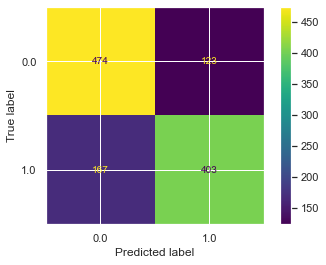

In [15]:
plot_confusion_matrix(lgbmc_opt,x_test_ori,y_test)

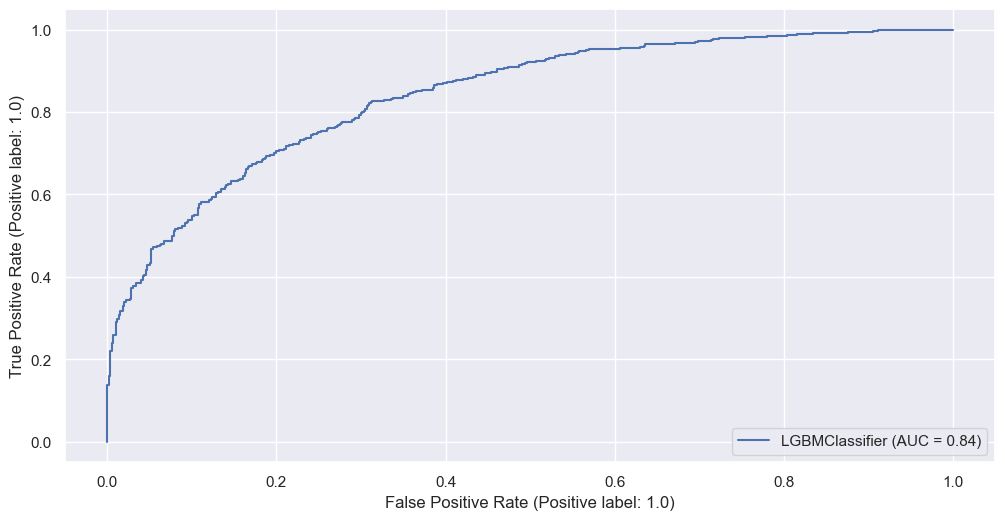

In [16]:
fig,ax=plt.subplots(figsize=(12,6),dpi=100)
plot_roc_curve(lgbmc_opt,x_test_ori,y_test,ax=ax);

# UMAP parameter tuning with LightGBM

In [68]:
# Below are codes for tuning parameters of umap with the optimal model we got for this dataset.
# However, I am unable to execute them due to computational & time cost of my laptop.
# Nevertheless, these codes should give you a rough idea about how I tune the parameters
# of umap & what candidates I think may be worthy of a try for each parameter.
from sklearn.pipeline import Pipeline
umap = umap.UMAP(random_state=1, n_jobs=-1)
lgbmc = LGBMClassifier(random_state=1)
pipeline = Pipeline([("umap", umap), ('lgbmc',lgbmc)], verbose=True)
params_grid_pipeline = {
    "umap__n_neighbors": [5, 10, 20, 50, 100],
    "umap__n_components": [15, 25, 50],
    'lgbmc__n_estimators': [100,200,400],
    'lgbmc__colsample_bytree': [0.75,0.8,0.85],
    'lgbmc__max_depth': [None],
    'lgbmc__reg_alpha': [1],
    'lgbmc__reg_lambda': [2, 5, 10],
    'lgbmc__subsample': [0.55, 0.6, .65],
    'lgbmc__learning_rate':[0.5],
    'lgbmc__min_child_weight':[0.01],
}

clf_pipeline = GridSearchCV(pipeline, params_grid_pipeline)
clf_pipeline.fit(x_train, y_train)
clf_pipeline.score(x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\numba\np\ufunc\parallel.py:366: NumbaWarning: The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11102. The TBB threading layer is disabled.
  warnings.warn(problem)


[Pipeline] .............. (step 1 of 2) Processing umap, total=   9.6s
[Pipeline] ............. (step 2 of 2) Processing lgbmc, total=   0.1s
[Pipeline] .............. (step 1 of 2) Processing umap, total=   7.1s
[Pipeline] ............. (step 2 of 2) Processing lgbmc, total=   0.1s
[Pipeline] .............. (step 1 of 2) Processing umap, total=   6.9s
[Pipeline] ............. (step 2 of 2) Processing lgbmc, total=   0.1s
[Pipeline] .............. (step 1 of 2) Processing umap, total=   6.8s
[Pipeline] ............. (step 2 of 2) Processing lgbmc, total=   0.1s
[Pipeline] .............. (step 1 of 2) Processing umap, total=   7.1s
[Pipeline] ............. (step 2 of 2) Processing lgbmc, total=   0.1s
[Pipeline] .............. (step 1 of 2) Processing umap, total=   8.5s
[Pipeline] ............. (step 2 of 2) Processing lgbmc, total=   0.0s
[Pipeline] .............. (step 1 of 2) Processing umap, total=   8.3s
[Pipeline] ............. (step 2 of 2) Processing lgbmc, total=   0.0s
[Pipel

KeyboardInterrupt: 

# Output

In [17]:
df_train_ori=pd.concat([y_train,x_train_ori],axis=1)
df_test_ori=pd.concat([y_test,x_test_ori],axis=1)
df_train=pd.concat([y_train,x_train],axis=1)
df_test=pd.concat([y_test,x_test],axis=1)
df_pred=pd.DataFrame(data=y_pred,columns=['class'])

df_train_ori.to_csv('./output/train_ori.csv',index=False)
df_test_ori.to_csv('./output/test_ori.csv',index=False)
df_train.to_csv('./output/train.csv',index=False)
df_test.to_csv('./output/test.csv',index=False)
df_pred.to_csv('./output/pred.csv',index=False)

# Conclusion & Remarks

<p>Based on the model exploration above, we can conclude that LightGBM with parameters bagging_fraction=0.6, boosting_type='gbdt', feature_fraction=0.5, learning_rate=0.05, max_depth=20, min_data_in_leaf=20, min_sum_hessian_in_leaf=0.001, n_estimators=50, reg_alpha=10 gives the optimal result. However, there are some important remarks to be mentioned:

 - Though dimension reduction "loses some information" by intuition, traditional methods such as SVM & Logistic Regression perform better on the reduced dataset (and there is a logic of "curse of dimensionality" behind it). However, tree methods (Random Forest, xgboost & lightgbm) seem to have a strong preference on the original data. The accuracy increases significantly by using the original data for these methods. By parameter tuning, we can also deal with the potential overfit problem decently.

 - The transformation method DOES matter a lot for this dataset, even more significant than model choice! Through my scrachy experiment, Models with transferred data using PCA generally experienced a larger loss in accuracy compared to umap. They constantly perform around 6% worse than using transferred data using umap, which emphasize the importance of how transformation approaches affect the performance.

 - Though we have tried various models on a dataset, the accuracy generally concentrates in a narrow width, and it is not satisfying enough, i.e. >=0.8. This invariance across model choices may suggest that either the dataset may have some internal flaws, or we have not exhausted the way to dig it. I, as a junior to the field of Data Science, I cannot allege which one is the case.

 - Albeit so, I have to admit that there are still potential exploration that could have been done. Due to computational cost & time limit, my laptop is not able to handle more advanced parameter tuning tasks, such as advanced tuning parameters for umap, which is another big topic waiting to be discussed. Do note that every parameter combo for umap requires its own validating process through models, which puts unacceptable time & computational costs on my laptop. :(